In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bike_buyers.csv")

In [3]:
df.shape

(1000, 13)

In [4]:
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [7]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Education Counts')

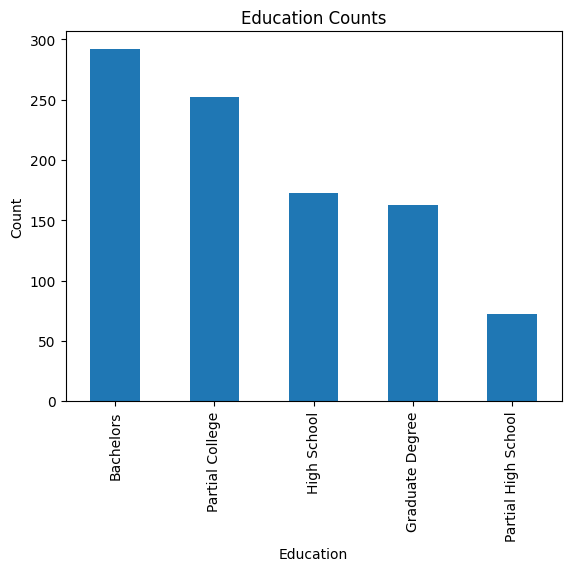

In [8]:
df['Education'].value_counts().plot(kind="bar")
plt.ylabel('Count')
plt.xlabel("Education")
plt.title("Education Counts")

In [9]:
df.groupby('Education')['Age'].mean()

Education
Bachelors              45.486301
Graduate Degree        44.742331
High School            44.341040
Partial College        43.079365
Partial High School    42.083333
Name: Age, dtype: float64

In [10]:
df.groupby("Gender")["Income"].mean()

Gender
Female    54566.596195
Male      57223.382046
Name: Income, dtype: float64

In [11]:
df.groupby(["Gender", "Marital Status"])["Income"].mean()

Gender  Marital Status
Female  Married           56794.871795
        Single            52384.937238
Male    Married           59647.887324
        Single            53692.307692
Name: Income, dtype: float64

In [12]:
df.groupby("Purchased Bike")["Income"].mean()

Purchased Bike
No     54455.645161
Yes    57478.070175
Name: Income, dtype: float64

In [13]:
df["Purchased Bike"] = df["Purchased Bike"].apply(lambda x: 1 if x == "Yes" else 0)

In [14]:
y = df["Purchased Bike"]
X = df[["Income", "Age", "Education", "Home Owner"]]

In [15]:
X

,Income,Age,Education,Home Owner
0,40000.0,42.0,Bachelors,Yes
1,30000.0,43.0,Partial College,Yes
2,80000.0,60.0,Partial College,No
4,30000.0,36.0,Bachelors,No
5,10000.0,50.0,Partial College,Yes
...,...,...,...,...
994,80000.0,46.0,Partial College,Yes
995,60000.0,54.0,High School,Yes
996,70000.0,35.0,Graduate Degree,Yes
998,100000.0,38.0,Bachelors,No


In [16]:
y

0      0
1      0
2      0
4      1
5      0
      ..
994    0
995    1
996    1
998    0
999    1
Name: Purchased Bike, Length: 952, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["Education"] = le.fit_transform(X["Education"])
X["Home Owner"] = le.fit_transform(X["Home Owner"])

/tmp/ipykernel_1435031/2348445532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Education"] = le.fit_transform(X["Education"])
/tmp/ipykernel_1435031/2348445532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Home Owner"] = le.fit_transform(X["Home Owner"])


In [18]:
X

,Income,Age,Education,Home Owner
0,40000.0,42.0,0,1
1,30000.0,43.0,3,1
2,80000.0,60.0,3,0
4,30000.0,36.0,0,0
5,10000.0,50.0,3,1
...,...,...,...,...
994,80000.0,46.0,3,1
995,60000.0,54.0,2,1
996,70000.0,35.0,1,1
998,100000.0,38.0,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
X.shape

(952, 4)

In [22]:
X.shape[0] * 0.8 # 80% which is our training set

761.6

In [23]:
from sklearn.metrics import accuracy_score # you can also use mse, r2 (squared)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [24]:
param_grid = {
    "splitter" : ["best", "random"],
    "max_depth" : [None, 10, 20, 30, 40, 50],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [25]:
tree_model = DecisionTreeClassifier()

In [26]:
grid_search_tree = GridSearchCV(tree_model, param_grid)

In [27]:
grid_search_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [28]:
grid_search_tree.best_params_

{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [29]:
pred_tree = grid_search_tree.predict(X_test)

In [30]:
accuracy_score(y_test, pred_tree)

0.6020942408376964

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

In [32]:
param_grid_rfc = {
    "max_features" : [2,3,4],
    "n_estimators" : [32,64,128,256],
}

In [33]:
grid_rfc = GridSearchCV(rfc_model, param_grid_rfc)

In [34]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [35]:
grid_rfc.best_params_

{'max_features': 4, 'n_estimators': 64}

In [36]:
pred_rfc = grid_rfc.predict(X_test)

In [37]:
accuracy_score(y_test, pred_rfc)

0.6387434554973822

In [38]:
grid_search_tree

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [39]:
import joblib
joblib.dump(grid_search_tree, "model.pkl")

['model.pkl']

In [40]:
X.columns

Index(['Income', 'Age', 'Education', 'Home Owner'], dtype='object')